In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from scipy.stats import chi2_contingency
plt.style.use('ggplot')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report
import seaborn as sb
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [23]:
pip install --upgrade pillow -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [2]:
df = pd.read_csv('clean_kaggle_data_2022.csv', encoding= 'unicode_escape')

<ipython-input-2-ed8fb974c3ab>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_kaggle_data_2022.csv', encoding= 'unicode_escape')


In [3]:
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,540,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
8133,603,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8134,557,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8135,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"


# Data Cleaning

In [4]:
df.dtypes

Duration (in seconds)     object
Q2                        object
Q3                        object
Q4                        object
Q5                        object
                          ...   
Q44_10                    object
Q44_11                    object
Q44_12                    object
Q29_Encoded              float64
Q29_buckets               object
Length: 298, dtype: object

In [5]:
# Find categrical columns that we can transform to numeric data
df_new = df.select_dtypes(include=['object']).copy()
df_new.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12', 'Q29_buckets'],
      dtype='object', length=297)

In [6]:
df_new = df_new.iloc[:, 1:]

In [7]:
df_new.isnull().mean()
# Delete all columns that have more than 70% missing value
df_new= df_new[df_new.columns[df_new.isnull().mean() < 0.7]]

In [8]:
df_new = df_new.fillna(value='unknown')
df_new = df_new.iloc[1:, :]
df_new

,Q2,Q3,Q4,Q5,Q6_1,Q7_2,Q7_4,Q7_5,Q8,Q9,...,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q43,Q44_4,Q44_6,Q44_8,Q29_buckets
1,55-59,Man,France,No,Coursera,"Online courses (Coursera, EdX, etc)",unknown,"Kaggle (notebooks, competitions, etc)",Some college/university study without earning ...,unknown,...,No / None,unknown,unknown,None,GPUs,2-5 times,"Kaggle (notebooks, forums, etc)",unknown,"Blogs (Towards Data Science, Analytics Vidhya,...","20,000-29,999"
2,30-34,Man,Germany,No,Coursera,"Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)",unknown,BachelorEEs degree,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...","100,000-124,999"
3,70+,Man,Australia,No,Coursera,unknown,unknown,"Kaggle (notebooks, competitions, etc)",Doctoral degree,Yes,...,No / None,None,No / None,None,unknown,Never,unknown,unknown,unknown,"100,000-124,999"
4,40-44,Man,United States of America,No,Coursera,"Online courses (Coursera, EdX, etc)",unknown,"Kaggle (notebooks, competitions, etc)",Doctoral degree,Yes,...,unknown,unknown,unknown,None,GPUs,2-5 times,unknown,unknown,"Blogs (Towards Data Science, Analytics Vidhya,...","200,000-299,999"
5,40-44,Man,United States of America,No,Coursera,unknown,unknown,"Kaggle (notebooks, competitions, etc)",MasterEEs degree,Yes,...,unknown,unknown,unknown,None,GPUs,More than 25 times,unknown,unknown,"Blogs (Towards Data Science, Analytics Vidhya,...","200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,No,unknown,"Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",MasterEEs degree,No,...,unknown,unknown,unknown,unknown,unknown,unknown,"Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Blogs (Towards Data Science, Analytics Vidhya,...","100,000-124,999"
8133,35-39,Man,India,No,unknown,"Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)",unknown,MasterEEs degree,No,...,No / None,unknown,unknown,None,unknown,Never,unknown,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknown,"0-9,999"
8134,40-44,Man,India,No,unknown,"Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)",unknown,BachelorEEs degree,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknown,"0-9,999"
8135,25-29,Man,Turkey,No,unknown,"Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",MasterEEs degree,Yes,...,No / None,None,No / None,None,unknown,Never,"Kaggle (notebooks, forums, etc)","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",unknown,"20,000-29,999"


In [9]:
#list the columns need to be encodered
encoded_column= list(df_new.columns)

# Use OrdinalEncoder to encode categrical data
encoders = {column: OrdinalEncoder() for column in encoded_column} 
for column in encoded_column:
    df_new[column] = encoders[column].fit_transform(df_new[[column]])

In [10]:
df_new

,Q2,Q3,Q4,Q5,Q6_1,Q7_2,Q7_4,Q7_5,Q8,Q9,...,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q43,Q44_4,Q44_6,Q44_8,Q29_buckets
1,8.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
2,3.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,2.0
3,10.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0
4,5.0,0.0,55.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0
5,5.0,0.0,55.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0
8133,4.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
8134,5.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0
8135,2.0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,5.0


In [11]:
#put the numerical columns back to the dataset
df_new['Duration (in seconds)'] = df['Duration (in seconds)']
df_new['Q29_Encoded'] = df['Q29_Encoded']

In [12]:
df_new.columns

Index(['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q7_2', 'Q7_4', 'Q7_5', 'Q8', 'Q9',
       'Q11', 'Q12_1', 'Q12_3', 'Q13_4', 'Q13_11', 'Q14_1', 'Q14_2', 'Q15_1',
       'Q15_2', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q18_1', 'Q18_2', 'Q18_3',
       'Q21_9', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28_1', 'Q28_2', 'Q28_3',
       'Q29', 'Q30', 'Q37_12', 'Q38_7', 'Q39_11', 'Q40_14', 'Q41_8', 'Q42_1',
       'Q43', 'Q44_4', 'Q44_6', 'Q44_8', 'Q29_buckets',
       'Duration (in seconds)', 'Q29_Encoded'],
      dtype='object')

In [13]:
#replacing by the majority data
df_new

,Q2,Q3,Q4,Q5,Q6_1,Q7_2,Q7_4,Q7_5,Q8,Q9,...,Q40_14,Q41_8,Q42_1,Q43,Q44_4,Q44_6,Q44_8,Q29_buckets,Duration (in seconds),Q29_Encoded
1,8.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,851,2.0
2,3.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,5.0,1.0,0.0,0.0,2.0,501,10.0
3,10.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,787,10.0
4,5.0,0.0,55.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,1132,13.0
5,5.0,0.0,55.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,...,1.0,0.0,0.0,2.0,1.0,1.0,0.0,6.0,679,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,540,10.0
8133,4.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,603,0.0
8134,5.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0,557,0.0
8135,2.0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,5.0,860,2.0


# 2.Exploratory data analysis and feature selection

In [36]:
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.9 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2452 sha256=c3a7cc89b6f5259bcc547dd013b3c97e7f74418e784082fcfb8813776f1c49de
  Stored in directory: /root/.cache/pip/wheels/e3/dc/eb/3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from featurewiz import featurewiz

ModuleNotFoundError: ignored

In [15]:
df_new

,Q2,Q3,Q4,Q5,Q6_1,Q7_2,Q7_4,Q7_5,Q8,Q9,...,Q40_14,Q41_8,Q42_1,Q43,Q44_4,Q44_6,Q44_8,Q29_buckets,Duration (in seconds),Q29_Encoded
1,8.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,851,2.0
2,3.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,5.0,1.0,0.0,0.0,2.0,501,10.0
3,10.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,787,10.0
4,5.0,0.0,55.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,1132,13.0
5,5.0,0.0,55.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,...,1.0,0.0,0.0,2.0,1.0,1.0,0.0,6.0,679,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,...,1.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,540,10.0
8133,4.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,603,0.0
8134,5.0,0.0,20.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.0,5.0,1.0,0.0,1.0,0.0,557,0.0
8135,2.0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,5.0,860,2.0


In [16]:
df_new = df_new.drop(['Q5'],axis=1)

In [17]:
X = df_new.drop(['Q29_Encoded'],axis=1)
y = df_new['Q29_Encoded']
X_scaled =  StandardScaler().fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [ ]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


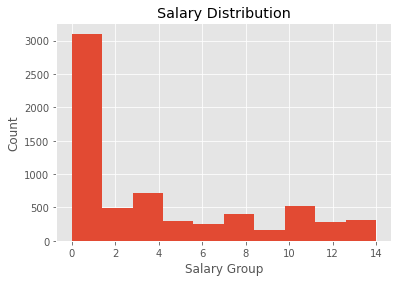

In [14]:
#Exploratory data analysis
plt.hist(df_new['Q29_Encoded'],bins=10)
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Salary Distribution')
plt.show()

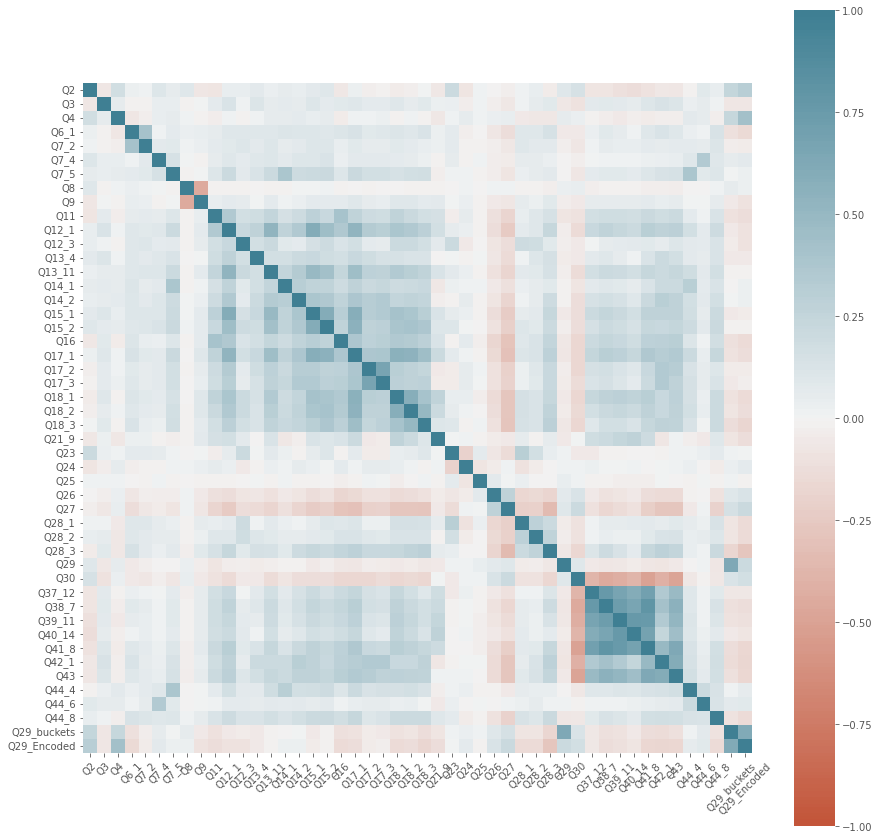

In [42]:
#print the correlation heatmap
corr = df_new.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [16]:
corr.style.background_gradient()

,Q2,Q3,Q4,Q6_1,Q7_2,Q7_4,Q7_5,Q8,Q9,Q11,Q12_1,Q12_3,Q13_4,Q13_11,Q14_1,Q14_2,Q15_1,Q15_2,Q16,Q17_1,Q17_2,Q17_3,Q18_1,Q18_2,Q18_3,Q18_7,Q21_9,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q29,Q30,Q37_12,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q43,Q44_4,Q44_6,Q44_8,Q29_buckets,Q29_Encoded
Q2,1.000000,-0.076205,0.176669,0.023826,0.013759,0.104858,0.047019,0.088355,-0.067679,-0.081279,0.043477,0.039670,0.063206,0.034936,0.057506,0.054240,0.078729,0.104147,-0.067144,0.028158,-0.022907,-0.013985,-0.036132,-0.014464,0.003266,-0.033892,-0.070119,0.204964,-0.082286,0.015336,-0.002067,-0.032716,0.024738,0.052548,-0.037390,0.082024,0.142764,-0.077524,-0.082781,-0.113757,-0.131082,-0.097203,-0.065877,-0.080508,-0.013396,0.071759,0.041845,0.236521,0.319686
Q3,-0.076205,1.000000,0.045181,-0.001327,-0.007773,0.040494,0.043497,-0.022378,0.016059,0.060130,0.134324,0.011384,0.119141,0.051251,0.067504,0.055313,0.106386,0.072776,0.074717,0.102950,0.066582,0.071268,0.093287,0.060612,0.082780,0.079256,0.029471,0.034863,-0.036197,0.015689,-0.023036,-0.064709,0.019395,0.047865,0.078844,-0.069084,-0.085925,0.066247,0.079702,0.068602,0.046988,0.099174,0.137227,0.111279,0.036205,0.060054,0.020417,-0.081838,-0.076228
Q4,0.176669,0.045181,1.000000,-0.075824,-0.025923,0.040836,0.067266,0.004281,-0.021772,-0.039913,0.018037,-0.012455,0.005683,0.058986,0.063522,0.068315,0.051553,0.060369,-0.051809,0.023876,0.014709,0.032402,-0.005912,0.002715,-0.033047,0.004936,-0.075335,0.013723,0.052647,0.007163,0.035445,0.050336,-0.053631,-0.065689,-0.064325,0.052525,0.038759,-0.023087,-0.036967,-0.054307,-0.040390,-0.050976,-0.028925,-0.023313,0.068600,0.051356,-0.024577,0.229728,0.440000
Q6_1,0.023826,-0.001327,-0.075824,1.000000,0.419650,0.013429,0.069346,0.039332,0.036290,0.064889,0.096031,0.095921,0.090403,0.090056,0.123183,0.098009,0.109508,0.101694,0.105521,0.130281,0.073876,0.099611,0.109085,0.100510,0.128233,0.081690,0.027338,0.068944,-0.036587,0.005791,-0.074156,-0.117312,0.099851,0.095244,0.140885,-0.060803,-0.050135,0.032675,0.079558,0.056170,0.022157,0.089187,0.139477,0.095153,0.034037,0.020191,0.140298,-0.108077,-0.144505
Q7_2,0.013759,-0.007773,-0.025923,0.419650,1.000000,0.073490,0.079966,0.028765,0.020092,0.072650,0.085642,0.103626,0.069836,0.108741,0.064751,0.069496,0.103518,0.108560,0.036646,0.079978,0.055899,0.054595,0.078375,0.066959,0.048301,0.035130,0.030353,0.065388,-0.021888,-0.005477,-0.031556,-0.060244,0.089576,0.077808,0.072365,-0.028500,-0.083095,0.028714,0.061579,0.045388,0.043447,0.072558,0.071658,0.070290,0.074113,0.064232,0.119204,-0.025806,-0.042533
Q7_4,0.104858,0.040494,0.040836,0.013429,0.073490,1.000000,0.146248,0.004033,-0.014049,0.046267,0.086796,0.068201,0.089046,0.102011,0.067137,0.094625,0.099822,0.114090,0.039870,0.071409,0.072248,0.079562,0.060408,0.057780,0.027431,0.046844,-0.032422,0.049777,-0.016371,0.006880,-0.034725,-0.043075,0.055912,0.065128,0.036124,0.002955,-0.036958,0.005889,0.016564,0.020703,0.018716,0.032252,0.034739,0.049799,0.089833,0.342728,0.088487,0.058714,0.073846
Q7_5,0.047019,0.043497,0.067266,0.069346,0.079966,0.146248,1.000000,-0.013099,0.007838,0.110016,0.209155,0.076141,0.130963,0.207544,0.387141,0.196033,0.205995,0.212033,0.106652,0.217716,0.158824,0.170541,0.145450,0.182539,0.178280,0.127826,-0.030512,0.019499,0.027877,-0.016321,-0.034182,-0.083216,0.036486,0.047481,0.078112,0.000018,-0.086097,0.061697,0.074979,0.075573,0.064814,0.107154,0.142465,0.143007,0.398800,0.081897,0.104274,0.004497,0.027460
Q8,0.088355,-0.022378,0.004281,0.039332,0.028765,0.004033,-0.013099,1.000000,-0.440854,-0.025980,-0.016128,-0.023129,-0.010532,-0.021123,-0.025570,0.006512,-0.002626,0.005456,-0.018343,0.000418,-0.017493,0.000076,-0.002254,-0.012955,-0.019583,0.000213,-0.006056,0.002586,0.007976,-0.006012,0.010702,0.021015,-0.015832,-0.013074,-0.026696,0.026162,0.042924,-0.023375,-0.012081,-0.018451,-0.008152,-0.027686,-0.031988,-0.033107,0.001756,-0.008738,0.011986,0.045322,0.029557
Q9,-0.067679,0.016059,-0.021772,0.036290,0.020092,-0.014

In [18]:
salary_correlation = df_new.corr().Q29_Encoded
top_20_features = abs(salary_correlation).sort_values(ascending = False)[2:22]
top_20_features

Q4       0.437203
Q2       0.315812
Q28_3    0.270721
Q27      0.213171
Q29      0.199864
Q42_1    0.176165
Q18_3    0.175587
Q41_8    0.164268
Q43      0.161690
Q30      0.159239
Q6_1     0.149941
Q18_1    0.147361
Q28_1    0.145949
Q28_2    0.144128
Q44_8    0.143590
Q16      0.143432
Q38_7    0.132217
Q18_2    0.131922
Q26      0.131524
Q21_9    0.128990
Name: Q29_Encoded, dtype: float64

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (8136, 49)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  

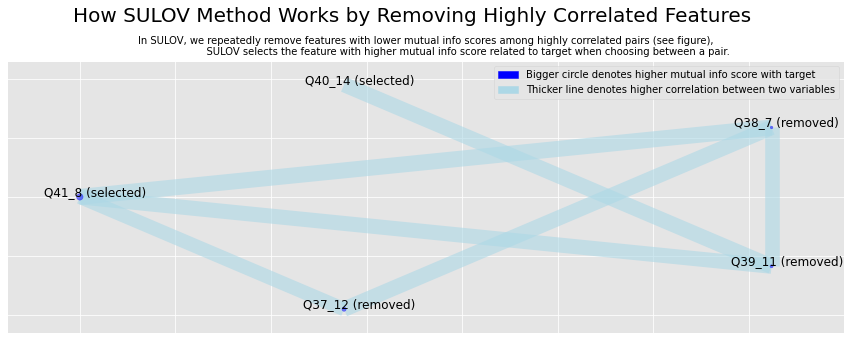

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 44
Finally 44 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 44 
    Taking top 11 features per iteration...
    XGBoost version using 1.7.4 as tree method: gpu_hist
Number of booster rounds = 100
        using 44 variables...
Regular XGBoost is crashing due to: [04:17:21] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.9/dist-packages/xgboost/lib/libxgboost.so(+0x29c069) [0x7f5a6bf

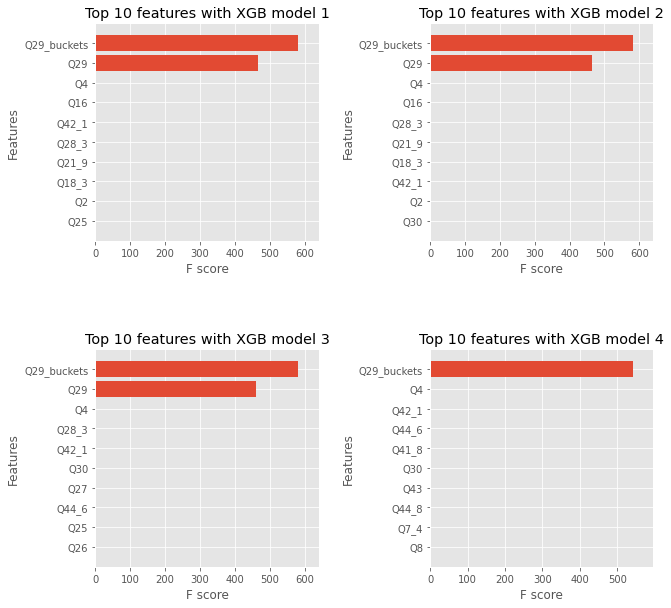

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 2 important features:
['Q29_buckets', 'Q29']
Total Time taken for featurewiz selection = 7 seconds
Output contains a list of 2 important features and a train dataframe


In [92]:
# Use featurewize function to find most valuable features automatically
features, train = featurewiz(df_new, 'Q29_Encoded', corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

#3.Model implementation

In [19]:
X = df_new[top_20_features.index]
y = df_new['Q29_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
X

,Q4,Q2,Q28_3,Q27,Q29,Q42_1,Q18_3,Q41_8,Q43,Q30,Q6_1,Q18_1,Q28_1,Q28_2,Q44_8,Q16,Q38_7,Q18_2,Q26,Q21_9
1,15.0,8.0,0.0,4.0,11.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2,16.0,3.0,0.0,3.0,4.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0
3,2.0,10.0,0.0,4.0,4.0,1.0,1.0,0.0,3.0,4.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,4.0,0.0
4,55.0,5.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,4.0,1.0
5,55.0,5.0,0.0,3.0,10.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,55.0,5.0,0.0,3.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,4.0,0.0
8133,20.0,4.0,1.0,3.0,8.0,1.0,0.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
8134,20.0,5.0,1.0,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0
8135,51.0,2.0,1.0,1.0,11.0,1.0,0.0,0.0,3.0,4.0,1.0,0.0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,1.0


In [21]:
y

1        2.0
2       10.0
3       10.0
4       13.0
5       13.0
        ... 
8132    10.0
8133     0.0
8134     0.0
8135     2.0
8136     1.0
Name: Q29_Encoded, Length: 8136, dtype: float64

In [22]:
X_train

,Q4,Q2,Q28_3,Q27,Q29,Q42_1,Q18_3,Q41_8,Q43,Q30,Q6_1,Q18_1,Q28_1,Q28_2,Q44_8,Q16,Q38_7,Q18_2,Q26,Q21_9
5243,26.0,2.0,1.0,5.0,17.0,0.0,1.0,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
7179,45.0,4.0,0.0,3.0,20.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,6.0,1.0
2040,20.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0,4.0,1.0
7468,20.0,2.0,1.0,4.0,0.0,1.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,1.0,1.0,8.0,1.0,1.0,5.0,1.0
1459,34.0,5.0,0.0,5.0,22.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,20.0,4.0,0.0,3.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,4.0,1.0
3790,20.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0,4.0,0.0,0.0,1.0,1.0,1.0,7.0,0.0,0.0,5.0,0.0
7972,23.0,3.0,1.0,3.0,23.0,0.0,1.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,4.0,0.0
6304,20.0,1.0,1.0,0.0,18.0,1.0,1.0,1.0,5.0,4.0,0.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,4.0,1.0


In [23]:
y_train

5243     4.0
7179     6.0
2040     0.0
7468     0.0
1459     7.0
        ... 
1558     2.0
3790     0.0
7972     8.0
6304     0.0
104     10.0
Name: Q29_Encoded, Length: 5695, dtype: float64

In [30]:
# Define a function to perform 10-fold cross-validation
def model_(X, y, model= LogisticRegression()):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in kfold.split(X, y):
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy score
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        REC = recall_score(y_test, y_pred, average = 'macro')
        F1S = f1_score(y_test, y_pred, average = 'macro')

    return scores, REC, F1S

In [31]:
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,200,500,1000]
# Evaluate the model for each combination of hyperparameters
best_score = 0
best_params = {}
for c in C:
      scores, REC, F1S = model_(X, y, model= LogisticRegression(C=c))
      mean_score = np.mean(scores)
      variance_score = np.var(scores)
      mean_REC = np.mean(REC)
      mean_F1S = np.mean(F1S)
      print(f'C: {c}, Mean accuracy: {mean_score:.3f}, Variance of accuracy: {variance_score:}, recall score:{mean_REC:}, F1S:{mean_F1S:}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 1e-05, Mean accuracy: 0.392, Variance of accuracy: 0.0, recall score:0.06666666666666667, F1S:0.03752330487685212


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 0.0001, Mean accuracy: 0.394, Variance of accuracy: 0.0, recall score:0.07742424295471759, F1S:0.054936208549665765


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 0.001, Mean accuracy: 0.403, Variance of accuracy: 3.0814879110195774e-33, recall score:0.1339722960943028, F1S:0.12424799668183666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 0.01, Mean accuracy: 0.395, Variance of accuracy: 0.0, recall score:0.1737306466149068, F1S:0.16746196556606777


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 0.1, Mean accuracy: 0.388, Variance of accuracy: 0.0, recall score:0.18988066153942607, F1S:0.18823588410118341


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 1, Mean accuracy: 0.389, Variance of accuracy: 0.0, recall score:0.19068400610569933, F1S:0.18924825097177603


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 10, Mean accuracy: 0.388, Variance of accuracy: 0.0, recall score:0.19678815226137095, F1S:0.19648492782103846


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 100, Mean accuracy: 0.390, Variance of accuracy: 0.0, recall score:0.18938196056096573, F1S:0.18510217851407215


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 200, Mean accuracy: 0.391, Variance of accuracy: 0.0, recall score:0.1863949726642832, F1S:0.1788321506572906


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 500, Mean accuracy: 0.391, Variance of accuracy: 0.0, recall score:0.1904218013705334, F1S:0.1895497291856634


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

C: 1000, Mean accuracy: 0.379, Variance of accuracy: 3.0814879110195774e-33, recall score:0.18333030001506836, F1S:0.17787027530576646


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Fit the best model on the entire dataset
model = LogisticRegression(C=100)
model.fit(X, y)

# Predict the probabilities of belonging to each of the salary buckets
prob = model.predict_proba(X)
print(prob)
print("The max value for probabilities is: "+ str(prob[0].max()) + ".")
print("The mean value for is: "+ str(prob[0].mean()) + ".")
print("The min value for probabilities is: "+ str(prob[0].min()) + ".")

[[1.67445405e-30 5.14559357e-08 6.65986750e-01 ... 3.57725211e-04
  2.76320963e-02 6.18496385e-05]
 [2.50627940e-09 8.35533955e-02 3.26966774e-03 ... 5.47068125e-02
  9.75391777e-04 4.22947278e-11]
 [1.02623726e-08 1.22388521e-01 8.23482564e-06 ... 1.11888656e-03
  1.47437610e-06 6.17563364e-18]
 ...
 [9.97608613e-01 2.03035445e-03 3.51528529e-10 ... 3.10025511e-08
  1.02599244e-11 1.50346369e-21]
 [2.82724538e-30 3.45890262e-08 4.59679943e-01 ... 5.65288598e-04
  2.90475115e-02 9.67461553e-06]
 [2.09233808e-01 7.90445833e-01 8.52944535e-05 ... 9.63794930e-06
  2.65788370e-07 9.25660499e-18]]
The max value for probabilities is: 0.6659867504474148.
The mean value for is: 0.06666666666666667.
The min value for probabilities is: 1.674454050290222e-30.


#Model Tuning

In [70]:
#print model result with different combination of hyperparameter 
Solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
C = [ 0.01, 0.1, 1, 10, 100,200,500,1000]

for c in C:
   for s in Solver:
        scores, REC, F1S = model(X, y, model= LogisticRegression(C=c,solver=s))
        mean_score = np.mean(scores)
        variance_score = np.var(scores)
        mean_REC = np.mean(REC)
        mean_F1S = np.mean(F1S)
        print(f'C: {c},Solver:{s}, Mean accuracy: {mean_score:.3f}, Variance of accuracy: {variance_score:}, recall score:{mean_REC:}, F1S:{mean_F1S:}')

C: 0.01,Solver:newton-cg, Mean accuracy: 0.463, Variance of accuracy: 0.0, recall score:0.3091123833387383, F1S:0.29374561390959386
C: 0.01,Solver:lbfgs, Mean accuracy: 0.389, Variance of accuracy: 0.0, recall score:0.16798857954445257, F1S:0.14535662626389473
C: 0.01,Solver:liblinear, Mean accuracy: 0.397, Variance of accuracy: 0.0, recall score:0.12682441050044166, F1S:0.10906413727861461
C: 0.01,Solver:sag, Mean accuracy: 0.404, Variance of accuracy: 0.0, recall score:0.18115120985654123, F1S:0.15803042868161038
C: 0.1,Solver:newton-cg, Mean accuracy: 0.479, Variance of accuracy: 3.0814879110195774e-33, recall score:0.3591604308260289, F1S:0.3516189188367394
C: 0.1,Solver:lbfgs, Mean accuracy: 0.391, Variance of accuracy: 0.0, recall score:0.18938344592835807, F1S:0.17299465496549093
C: 0.1,Solver:liblinear, Mean accuracy: 0.405, Variance of accuracy: 0.0, recall score:0.14566585462039086, F1S:0.1329582544051975
C: 0.1,Solver:sag, Mean accuracy: 0.400, Variance of accuracy: 1.090882

In [33]:
# Fit the best model on the entire dataset
model = LogisticRegression(C=500, solver='liblinear')
model.fit(X, y)

# Predict the probabilities of belonging to each of the salary buckets
prob = model.predict_proba(X)
print(prob)
print("The max value for probabilities is: "+ str(prob[0].max()) + ".")
print("The mean value for is: "+ str(prob[0].mean()) + ".")
print("The min value for probabilities is: "+ str(prob[0].min()) + ".")

[[0.19432132 0.12886432 0.21492737 ... 0.02355239 0.02963508 0.02156173]
 [0.49291049 0.23326666 0.09816993 ... 0.0125026  0.00522185 0.00979661]
 [0.19943094 0.24743753 0.17254138 ... 0.02046229 0.01298447 0.004821  ]
 ...
 [0.65427147 0.17334876 0.07192371 ... 0.00678826 0.00163883 0.00310629]
 [0.69187904 0.03596928 0.05169974 ... 0.02476734 0.02164793 0.01486302]
 [0.69921883 0.07844742 0.09748847 ... 0.0106449  0.00420939 0.00457078]]
The max value for probabilities is: 0.2149273709781183.
The mean value for is: 0.06666666666666665.
The min value for probabilities is: 1.835885783892862e-18.


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Feature: 0, Score: -0.05189
Feature: 1, Score: -0.40461
Feature: 2, Score: 0.85316
Feature: 3, Score: -0.16746
Feature: 4, Score: -1.07963
Feature: 5, Score: 0.24807
Feature: 6, Score: 0.44564
Feature: 7, Score: 0.13576
Feature: 8, Score: -0.04019
Feature: 9, Score: -0.05690
Feature: 10, Score: 0.69225
Feature: 11, Score: -0.08110
Feature: 12, Score: 0.15068
Feature: 13, Score: 0.08137
Feature: 14, Score: 0.33167
Feature: 15, Score: -0.01801
Feature: 16, Score: 0.03963
Feature: 17, Score: -0.03104
Feature: 18, Score: -0.09895
Feature: 19, Score: 0.49320


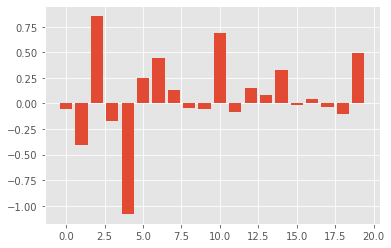

In [34]:
model = LogisticRegression(C=500, solver = 'newton-cg')
model.fit(X, y)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
model= LogisticRegression(C=500, solver = 'newton-cg')
model.fit(X_train, y_train)
# predict the target variable for the test set
y_pred = model.predict(X_test)

# evaluate the performance of the model on the test set
test_score = f1_score(y_test, y_pred, average='weighted')
print("Test F1-score: ", test_score)

# evaluate the performance of the model on the training set
train_score = f1_score(y_train, model.predict(X_train), average='weighted')
print("Training F1-score: ", train_score)



Test F1-score:  0.42418106535767447
Training F1-score:  0.4481527135612237


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


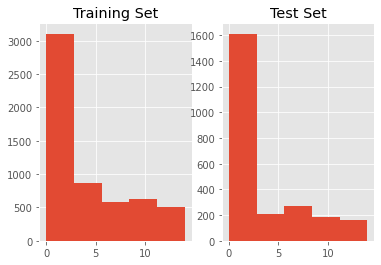

In [45]:
# plot the distribution of true target variable values and their predictions
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=5)
plt.title('Training Set')

plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=5)
plt.title('Test Set')

plt.show()